In [ ]:
import pandas as pd
import numpy as np
import re
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Research/automatedlabel/datasets/'
file_names = [
    'datasets4.csv'
]

Mounted at /content/drive


In [ ]:
dfs = []

for file_name in file_names:
  data = pd.read_csv(data_path + file_name)
  dfs.append(data)


In [ ]:
data = pd.concat(dfs, ignore_index=True)
data.sample(10)


,userName,content,score,at,appVersion,text,label,sentiment,clean_content
34474,Pengguna Google,Bagus,0.999844,2022-07-29 05:20:51,4.36.1,"Translated(src=id, dest=en, text=b'Good', pron...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999844431877...",bagus
33030,Hermawan setyo atmoko,Ok Sangat bermanfaat sekali terus kembangkan l...,0.998324,2022-02-13 05:38:00,4.36.1,"Translated(src=id, dest=en, text=b'Ok Very use...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.998324453830...",ok manfaat kembang y gan
14165,kevin gienardy,Good,0.999844,2022-03-22 06:33:14,4.39.2,"Translated(src=id, dest=en, text=b'Good', pron...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999844431877...",good
6634,Dodi Bariman,Very good,0.999860,2022-04-17 08:03:03,4.40.1,"Translated(src=id, dest=en, text=b Very good',...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999859690666...",very good
5799,irni octafriyani,good,0.999844,2022-04-07 04:43:02,4.40.1,"Translated(src=id, dest=en, text=b'good', pron...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999844431877...",good
28989,febri wenti,Mantap,0.999769,2022-01-29 11:09:05,4.36.1,"Translated(src=id, dest=en, text=b'Great', pro...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999768555164...",mantap
31559,Ziqry Ramadhan,Sekarang gojek lama cariin drivernya mau sejam...,0.527792,2022-02-15 16:31:14,4.36.1,"Translated(src=id, dest=en, text=Now GoJek tak...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.527792215347...",gojek cariin drivernya jam nyarinya tutup aja ...
19912,Zakiah Kadir,Sangat bgus,0.999852,2022-03-13 10:12:33,4.38.2,"Translated(src=id, dest=en, text=Very good', p...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999852061271...",bgus
43765,Bryan Dwi Saputra,Rekomendasi resto nya yg deket aja dong kasian...,0.990250,2021-12-22 11:26:55,4.34.1,"Translated(src=id, dest=en, text=b'Recommendat...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.990249812602...",rekomendasi resto nya yg deket aja kasi driver...
41479,Ba Ga,Sangat baik,0.999860,2022-01-25 11:33:47,4.34.1,"Translated(src=id, dest=en, text=b'Very good',...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999859690666...",NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userName       45000 non-null  object 
 1   content        45000 non-null  object 
 2   score          45000 non-null  float64
 3   at             45000 non-null  object 
 4   appVersion     45000 non-null  object 
 5   text           45000 non-null  object 
 6   label          45000 non-null  object 
 7   sentiment      45000 non-null  object 
 8   clean_content  44151 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.1+ MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = data['clean_content']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# print(X_train.isnull().sum())
# # Check for NaN values in X_test
# print(X_test.isnull().sum())


In [ ]:
# # Drop rows with NaN values
# X_train.dropna(inplace=True)
# X_test.dropna(inplace=True)


In [ ]:
# X_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)

In [ ]:
# Replace NaN values with empty strings
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Proceed with TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_normalized = vectorizer.fit_transform(X_train)
X_test_normalized = vectorizer.transform(X_test)

In [ ]:
# Replace NaN values with empty strings
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Proceed with TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_normalized = vectorizer.fit_transform(X_train)
X_test_normalized = vectorizer.transform(X_test)

In [ ]:
print(X_train_normalized.shape)
print(y_train.shape)

(33750, 17475)
(33750,)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi klasifikasi
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Multilayer Perceptron": MLPClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()  # Tambahkan model Naive Bayes
}

results = {}

# Training dan evaluasi masing-masing model dengan Grid Search CV
for clf_name, clf in classifiers.items():
    pipeline = make_pipeline(StandardScaler(with_mean=False), clf)
    param_grid = {}  # Definisikan parameter grid sesuai kebutuhan
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # Cross-validation dengan 5 fold
    grid_search.fit(X_train_normalized, y_train)
    y_pred = grid_search.predict(X_test_normalized)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[clf_name] = {"accuracy": accuracy, "classification_report": report}

# Menampilkan hasil perbandingan
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")

    print(result['classification_report'])
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier: Decision Tree
Accuracy: 0.8726222222222222
Classification Report:
{'NEGATIVE': {'precision': 0.8375105604055195, 'recall': 0.7765013054830288, 'f1-score': 0.8058528654653841, 'support': 3830}, 'POSITIVE': {'precision': 0.8888167294453825, 'recall': 0.9222371967654986, 'f1-score': 0.9052185991136981, 'support': 7420}, 'accuracy': 0.8726222222222222, 'macro avg': {'precision': 0.863163644925451, 'recall': 0.8493692511242636, 'f1-score': 0.8555357322895412, 'support': 11250}, 'weighted avg': {'precision': 0.8713498292300336, 'recall': 0.8726222222222222, 'f1-score': 0.8713900871249831, 'support': 11250}}


Classifier: Multilayer Perceptron
Accuracy: 0.8868444444444444
Classification Report:
{'NEGATIVE': {'precision': 0.8540570479091665, 'recall': 0.8052219321148825, 'f1-score': 0.8289208439725843, 'support': 3830}, 'POSITIVE': {'precision': 0.9023432386438015, 'recall': 0.9289757412398922, 'f1-score': 0.9154658343847533, 'support': 7420}, 'accuracy': 0.8868444444444444, 'macro

In [ ]:
import pandas as pd

# Membuat DataFrame dari hasil uji coba
results_df = pd.DataFrame(results).T

# Menyiapkan kolom-kolom untuk akurasi, precision, recall, f1-score, dan support
results_df['accuracy'] = results_df['classification_report'].apply(lambda x: x['accuracy'])
results_df['precision'] = results_df['classification_report'].apply(lambda x: x['macro avg']['precision'])
results_df['recall'] = results_df['classification_report'].apply(lambda x: x['macro avg']['recall'])
results_df['f1-score'] = results_df['classification_report'].apply(lambda x: x['macro avg']['f1-score'])
results_df['support'] = results_df['classification_report'].apply(lambda x: x['macro avg']['support'])

# Menampilkan tabel hasil uji coba dengan kolom tambahan
print(results_df[['accuracy', 'precision', 'recall', 'f1-score', 'support']])


                       accuracy  precision    recall  f1-score  support
Decision Tree          0.872622   0.863164  0.849369  0.855536    11250
Multilayer Perceptron  0.886844   0.878200  0.867099  0.872193    11250
SVM                    0.883467   0.870270  0.870223  0.870246    11250
KNN                    0.770933   0.791448  0.685305  0.699707    11250
Logistic Regression    0.879022   0.869974  0.857316  0.863040    11250
Random Forest          0.898311   0.889045  0.883055  0.885918    11250
Naive Bayes            0.878578   0.869041  0.857421  0.862716    11250


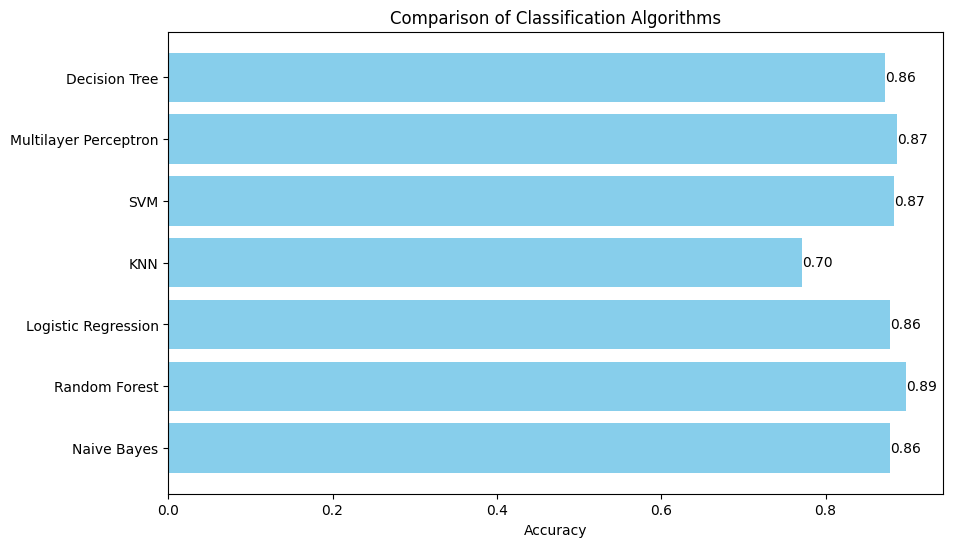

In [ ]:
import matplotlib.pyplot as plt

# Mendefinisikan nama-nama algoritma
classifiers_names = list(results.keys())

# Mengambil nilai akurasi dari setiap algoritma
accuracy_values = [results[classifier]['accuracy'] for classifier in classifiers_names]

# Mengambil nilai score dari masing-masing algoritma
score_values = [results[classifier]['classification_report']['macro avg']['f1-score'] for classifier in classifiers_names]

# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers_names, accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Classification Algorithms')

# Menambahkan label nilai akurasi pada batang diagram
for bar, score in zip(bars, score_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}',
             va='center', ha='left', fontsize=10, color='black')

plt.gca().invert_yaxis()  # Membalik urutan algoritma agar yang paling atas adalah yang memiliki akurasi tertinggi
plt.show()
